In [ ]:
!pip install kagglehub

In [ ]:
!pip install pandas

In [ ]:
!pip install matplotlib

In [ ]:
!pip install seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
# import seaborn as sns
# sns.set(style='white')

In [29]:
df = pd.read_csv("../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [30]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [34]:
df["Churn"].value_counts()/df.shape[0]

Churn
No     0.73463
Yes    0.26537
Name: count, dtype: float64

In [35]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [36]:
df.columns 

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int64  
 3   Dependents        0 non-null      float64
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int64  
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   int64  
 16  PaymentMethod     7032 non-null 

## Data Cleaning

In [38]:
num_features = df.select_dtypes(include=['int64','float64'])
cat_features = df.select_dtypes(include=['object'])

In [39]:
cat_features.columns

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')

In [40]:
df['SeniorCitizen'].value_counts()

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

In [41]:
# Changing the dtype of TotalCharges from object to int
df.TotalCharges = pd.to_numeric(df.TotalCharges,errors='coerce')
df.isna().sum()


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [42]:
# Setting customer id as index
df.set_index('customerID',inplace=True)

In [58]:
df['MonthlyCharges'].value_counts()

MonthlyCharges
20.05    61
19.95    44
19.90    44
19.85    44
19.65    43
         ..
21.45     1
87.75     1
73.10     1
56.85     1
43.05     1
Name: count, Length: 1584, dtype: int64

In [44]:
#Removing missing values 
df=df.dropna()

#Convertin the variables in a binary numeric variable
df['Churn']=df['Churn'].map({'Yes':1, 'No':0})
df['Partner']=df['Partner'].map({'Yes':1, 'No':0})
df['Dependents']=df['Partner'].map({'Yes':1, 'No':0})
df['PhoneService']=df['PhoneService'].map({'Yes':1, 'No':0})
df['PaperlessBilling']=df['PaperlessBilling'].map({'Yes':1, 'No':0})


In [47]:
df['SeniorCitizen'].value_counts()

SeniorCitizen
0    5890
1    1142
Name: count, dtype: int64

In [46]:
#Let's convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df, drop_first=True)
df_dummies.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Male', 'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [ ]:
# Dropping columns which could introduce multicollinearity
df_dummies.drop(['OnlineBackup_No internet service','OnlineSecurity_No internet service','TechSupport_No internet service','DeviceProtection_No internet service'
                ,'StreamingTV_No internet service','StreamingMovies_No internet service'],axis=1,inplace=True)

## EDA

<Figure size 1500x800 with 0 Axes>

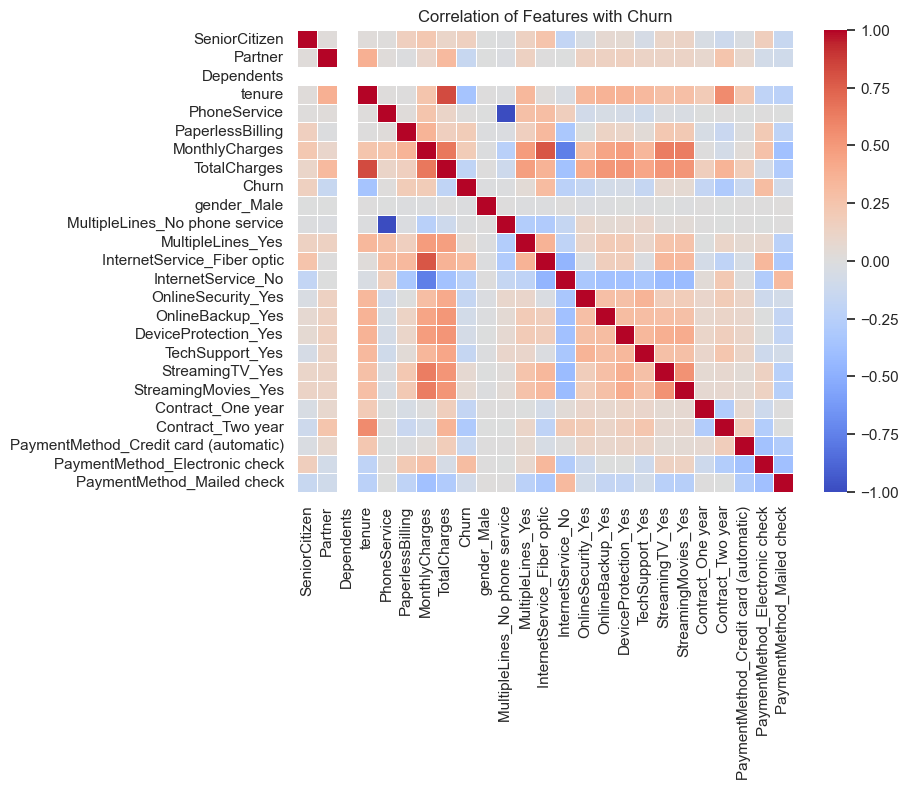

In [81]:
# Correlation for "Churn" with other variables
plt.figure(figsize=(15,8))
# corr_churn = df_dummies.corr()[['Churn']].sort_values(by='Churn',ascending=False)
# sns.heatmap(corr_churn, annot=True, cmap='coolwarm', center=0, cbar=True)

correlation_matrix = df_dummies.corr(numeric_only=True)

# 3. Plot the heatmap
plt.figure(figsize=(8, 6)) # Optional: Adjust the figure size
sns.heatmap(
    correlation_matrix,
    # annot=True,     # Display the correlation values on the heatmap cells
    cmap='coolwarm', # Use a diverging color map (e.g., 'coolwarm', 'RdYlBu_r')
    center=0,       # Ensure the neutral correlation (0) is the center color
    linewidths=.5   # Add lines between cells for better readability
)

plt.title('Correlation of Features with Churn')
plt.show()

In [80]:
df_dummies.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Male', 'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')